# Microsoft new movie studio: Oldies but Goodies

![Movie studios image](https://support.musicgateway.com/wp-content/uploads/2021/07/best-movie-studios-ever-1.png)

## Overview:

Microsoft is trying to break into a robust industry with no prior experience. There are numerous factors and moving parts which must be taken into consideration when making a movie, and the sheer number of forks in the road can create a barrier to entry. Where does one even start? The findings of this project offer a clear, logical path to entry into the movie industry. Each recommendation follows that the previous is accepted, and delves deeper to offer a highly specific path. This project analyzes the most capital efficient and least risky movies to make, and provides a streamlined approach to implement our major findings. Data analysis of multiple movie databases shows that reboots of blockbusters from the 80’s and 90’s are by far the best method to approach this business problem. To take it a step further, this project analyzes specific genres within this class of reboots. Finally, individualized intellectual property acquisitions are recommended on a budgetary basis. 

## Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. We are charged with exploring what types of films are currently doing the best at the box office. We must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## Data understanding

#### rotten_tomatoes_movies.csv
* **Source** : This RottenTomatoes dataset comes from [Kaggle](https://www.kaggle.com/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset?select=rotten_tomatoes_critic_reviews.csv)
* **Contents** : Data about movies including their synopsis, rating, genre, director, writer, release data in theatre, release data on DVD, Box office rental profit, length of movie and studio of production.

#### tmdb.movies.csv
* **Source** : This dataset is provided to us by Flatiron school.A compressed version of the data file is available in the project repo in the folder "zippedData". 
* **Contents** : Data about movies' domestic and international gross profit along with the name of studio production and release year

#### tn.movie_budgets.csv
* **Source** : [The Number](https://www.the-numbers.com/) dataset is provided to us by Flatiron school.A compressed version of the data file is available in the project repo in the folder "zippedData".
* **Contents** : Data about movies' production budget along with release date, domestic gross and worldwide gross


Below we import the `sqlite3`, `pandas` and `numpy`, which will be used to for reading and exploring our data. We are also importing `seaborn` and `matplotlib` modules, which we will use for visualization.

In [184]:
#Run this cell without changes
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Functions for our analysis

In [185]:
def remove_chars(ds,char):
    """
    remove characters from the data series
    -
    ds: data series, lists. Element in data series or list must be a string.
    char: character to be removed. Accepts lists
    """
    for char in char:
        idx = 0
        for row in ds:
            if char in row:
                ds[idx] = row.replace(char,"")
            idx +=1
    return ds


### Loading the datasets

#### Rotten Tomatoes

In [189]:
#Load Rotten Tomatoes data using pandas 
rt_movies_df = pd.read_csv('./zippedData/rotten_tomatoes_movies.csv')
rt_movies_df.head(3)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8


#### The number (budgets)

In [190]:
#Load The number data using pandas 
movie_budget_df = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')
movie_budget_df.head()
# movie_budget_df.info()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


#### TMDB movies

In [191]:
#Load Rotten Tomatoes data using pandas 
tmdb_movies_df = pd.read_csv('./zippedData/tmdb.movies.csv.gz')

#Remove unwanted characters 
remove_chars(tmdb_movies_df['genre_ids'],["[","]"]) #genre_ids now is a string. Function turns it into a list.

tmdb_movies_df.head(2)
# tmdb_movies_df.info()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"12, 14, 10751",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"14, 12, 16, 10751",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


In [192]:
#Look at data info
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


## 1. Why Reboots?

We want to show from the data:
- List of the top 50 grossing movies of the 80s and 90s
- How many of these top 50 movies of the 80s and 90s have a remake?
- Compare the average grossing of the remakes of these movies with the average grossing of the non-remake movies.

* Talk in details which data set we use in for this analysis
* what are the limitations of the data set for this anlysis?

#### Top 50 grossing movies of the 80s and 90s using The Numbers data

Let's start with cleaning and prepping The Numbers data to be use to answer our questions.

In [193]:
#convert the release date column to datetime format and extract the year to put in a separate column
movie_budget_df['release_date'] = pd.to_datetime(movie_budget_df['release_date'])
movie_budget_df['Year'] = movie_budget_df['release_date'].dt.year

In [194]:
#Sanity check
movie_budget_df.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011


In [195]:
#using the funtion defined above, remove '$ and ,' from production budget, domestic gross and worldwide gross

#Remove unwanted characters 
strings_to_remove = ['$',',']

remove_chars(movie_budget_df['production_budget'],strings_to_remove)
remove_chars(movie_budget_df['domestic_gross'],strings_to_remove)
remove_chars(movie_budget_df['worldwide_gross'],strings_to_remove)

#Convert column dtype to float and divide by a million. 
movie_budget_df['production_budget'] = movie_budget_df['production_budget'].astype(float)/ 1000000
movie_budget_df['domestic_gross'] = movie_budget_df['domestic_gross'].astype(float)/ 1000000
movie_budget_df['worldwide_gross'] = movie_budget_df['worldwide_gross'].astype(float)/ 1000000

In [196]:
#Sanity check
movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year
0,1,2009-12-18,Avatar,425.0,760.507625,2776.345279,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410.6,241.063875,1045.663875,2011
2,3,2019-06-07,Dark Phoenix,350.0,42.762350,149.762350,2019
3,4,2015-05-01,Avengers: Age of Ultron,330.6,459.005868,1403.013963,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317.0,620.181382,1316.721747,2017


In [197]:
#Change the release_date into datetime format.
movie_budget_df['release_date'] = pd.to_datetime(movie_budget_df['release_date'])
movie_budget_df['Year'] = movie_budget_df['release_date'].dt.year
movie_budget_df.describe()

,id,production_budget,domestic_gross,worldwide_gross,Year
count,5782.000000,5782.000000,5782.000000,5782.000000,5782.000000
mean,50.372363,31.587757,41.873327,91.487461,2003.967139
std,28.821076,41.812077,68.240597,174.719969,12.724386
min,1.000000,0.001100,0.000000,0.000000,1915.000000
25%,25.000000,5.000000,1.429534,4.125415,2000.000000
50%,50.000000,17.000000,17.225945,27.984448,2007.000000
75%,75.000000,40.000000,52.348662,97.645837,2012.000000
max,100.000000,425.000000,936.662225,2776.345279,2020.000000


In [198]:
#subset df to only includes only entries for movies between 1980 and 2000
decades_df = movie_budget_df[(movie_budget_df['Year'] >= 1980) & (movie_budget_df['Year'] <=2000)]
decades_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year
42,43,1997-12-19,Titanic,200.0,659.363944,2208.208395,1997
106,7,1999-06-30,Wild Wild West,175.0,113.805681,221.229335,1999
109,10,1995-07-28,Waterworld,175.0,88.246220,264.246220,1995
199,100,1999-06-16,Tarzan,145.0,171.091819,448.191819,1999
207,8,1998-07-01,Armageddon,140.0,201.578182,554.600000,1998


In [199]:
#get the top 50 grossing movies of 80s and 90s.
decades_top50_df = decades_df.sort_values(by='worldwide_gross',ascending=False).head(50)
#Assign the names to a list
decades_top50_list= list(decades_top50_df['movie'])
decades_top50_df.head() #List of the top 50 grossing movies of the 80s and 90s

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year
42,43,1997-12-19,Titanic,200.0,659.363944,2208.208395,1997
824,25,1993-06-11,Jurassic Park,63.0,395.708305,1038.812584,1993
303,4,1999-05-19,Star Wars Ep. I: The Phantom Menace,115.0,474.544677,1027.044677,1999
608,9,1994-06-15,The Lion King,79.3,421.785283,986.214868,1994
626,27,1996-07-02,Independence Day,75.0,306.169255,817.400878,1996


In [200]:
#top 10 high grossing movies from 80s and 90s
decades_top50_df.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year
42,43,1997-12-19,Titanic,200.0,659.363944,2208.208395,1997
824,25,1993-06-11,Jurassic Park,63.0,395.708305,1038.812584,1993
303,4,1999-05-19,Star Wars Ep. I: The Phantom Menace,115.0,474.544677,1027.044677,1999
608,9,1994-06-15,The Lion King,79.3,421.785283,986.214868,1994
626,27,1996-07-02,Independence Day,75.0,306.169255,817.400878,1996
3525,26,1982-06-11,ET: The Extra-Terrestrial,10.5,435.110554,792.965326,1982
981,82,1994-07-06,Forrest Gump,55.0,330.151138,679.850637,1994
1374,75,1999-08-06,The Sixth Sense,40.0,293.506292,672.806292,1999
630,31,1997-05-22,The Lost World: Jurassic Park,75.0,229.086679,618.638999,1997
2485,86,1991-11-13,Beauty and the Beast,20.0,376.057266,608.431132,1991


Now that we have the list of the top 50 grossing movies of the 80s and 90s, let's find out how many of them are rebooted.

#### How many of these movies are rebooted?

In [201]:
#Add a column in the movie_budget data frame called 'Reboot' for which we have Boolean values
# True if it is a remake of the top grossing 80s or 90s movie

check_reboot_df = movie_budget_df
check_reboot_df['Reboot'] = False

index=[]
for decade_movie in decades_top50_list:
        if len(check_reboot_df.loc[check_reboot_df['movie'].str.contains(decade_movie, case = False, regex=True)])>1:
            index=list(check_reboot_df.loc[check_reboot_df['movie'].str.contains(decade_movie, case = False, regex=True)].index)
            for indice in index:
                check_reboot_df['Reboot'][indice] =True

check_reboot_df['Reboot'].value_counts() #76 remakes

False    5706
True       76
Name: Reboot, dtype: int64

In [202]:
#We see the data needs some hard-coding for remake movies whose titles are not identical as the original movies


franchise=["Terminator 2: Judgment Day","Star Wars Ep. V: The Empire Strikes Back",
           "Star Wars Ep. VI: Return of the Jedi","Star Wars Ep. I: The Phantom Menace", "Jurassic", 
           "Indiana Jones and the Last Crusade", "Raiders of the Lost Ark"]
for movie in franchise:
    index=check_reboot_df.loc[check_reboot_df['movie'] == movie].index
    check_reboot_df['Reboot'][index] = True
    
check_reboot_df['Reboot'].value_counts() #82 remakes

False    5700
True       82
Name: Reboot, dtype: int64

In [203]:
check_reboot_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year,Reboot
0,1,2009-12-18,Avatar,425.0000,760.507625,2776.345279,2009,False
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410.6000,241.063875,1045.663875,2011,False
2,3,2019-06-07,Dark Phoenix,350.0000,42.762350,149.762350,2019,False
3,4,2015-05-01,Avengers: Age of Ultron,330.6000,459.005868,1403.013963,2015,False
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317.0000,620.181382,1316.721747,2017,False
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,0.0070,0.000000,0.000000,2018,False
5778,79,1999-04-02,Following,0.0060,0.048482,0.240495,1999,False
5779,80,2005-07-13,Return to the Land of Wonders,0.0050,0.001338,0.001338,2005,False
5780,81,2015-09-29,A Plague So Pleasant,0.0014,0.000000,0.000000,2015,False


In [204]:
#Merge check_reboot_df with decades_top50_df to see how many out of top grossing 80s and 90s movies have remakes
decades_merge_df=decades_top50_df.merge(check_reboot_df, how = 'left', on = 'movie')
decades_merge_df_cleaned = decades_merge_df.drop(['release_date_x', 'id_y', 'release_date_y', 
                                                  'production_budget_y', 'domestic_gross_y', 'worldwide_gross_y', 
                                                  'Year_y'], axis = 1)
decades_merge_df_cleaned = decades_merge_df_cleaned.drop_duplicates(subset=None, keep='first', inplace=False)

Reboot_graph = decades_merge_df_cleaned['Reboot'].value_counts() 
Reboot_graph

#28 out of 50 top grossing movies from 80s and 90s have remakes! 
#~56% of the movies

True     28
False    22
Name: Reboot, dtype: int64

<Figure size 1080x360 with 0 Axes>

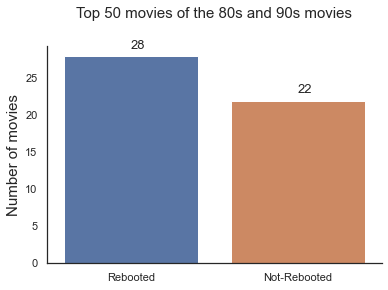

In [205]:
#plot for how many 80s and 90s movie has a remake already
plt.figure(figsize=(15,5))
fig, ax = plt.subplots()

sns.set_theme(style="white")
sns.barplot(['Rebooted','Not-Rebooted'], Reboot_graph.values)

ax.set_title("Top 50 movies of the 80s and 90s movies", y =1.1, fontsize = 15)
ax.set_xlabel("")
ax.set_ylabel("Number of movies", fontsize = 15)
#ax.set_xticklabels(["Not Rebooted","Rebooted"]
plt.text(0,29,28, fontsize = 13)
plt.text(1,23,22, fontsize = 13)

#plt.text(32, Reboot_graph.index[0], '32')
#ax.legend()
sns.despine()
plt.savefig('./Images/Reboot_decades.jpeg',bbox_inches='tight')

plt.show()


So.. Out of the top 50 grossing film from the 80s and 90s, 28 of them were rebooted! Cool. 

####  Now, how much the 20th century reboots are making versus other 20th century original movies?

In [206]:
#subset df for movies which have a reboot and were were released after 2000
rebooted_2000_df= movie_budget_df[(movie_budget_df['Reboot']==True) & (movie_budget_df['Year']>2000)]
rebooted_2000_df = rebooted_2000_df.groupby(by='Year').mean()

In [207]:
#subset df for movies which don't have a reboot and were released after 2000
non_rebooted_2000_df= movie_budget_df[(movie_budget_df['Reboot']==False) & (movie_budget_df['Year']>2000)]
non_rebooted_2000_df=non_rebooted_2000_df.sample(100, random_state=11)
non_rebooted_2000_df = non_rebooted_2000_df.groupby(by='Year').mean()

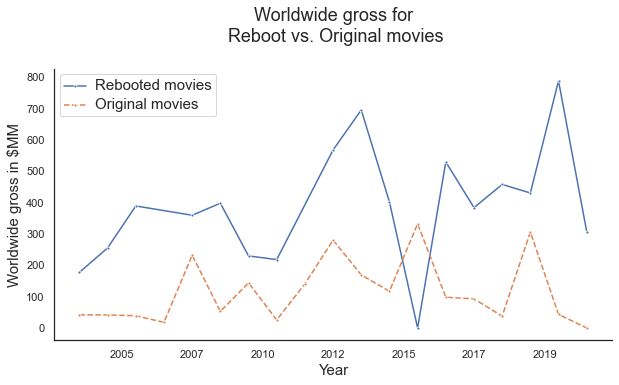

In [208]:
#comparing the mean worldwide gross for remade movies vs original movies after the year 2000
fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(style="white")
sns.lineplot(rebooted_2000_df.index, rebooted_2000_df['worldwide_gross'], linestyle="-", label='Rebooted movies', marker='.')
sns.lineplot(non_rebooted_2000_df.index, non_rebooted_2000_df['worldwide_gross'], linestyle="--", label='Original movies', marker='.')
#ax.plot(scaley=False)
ax.set_title("Worldwide gross for\n Reboot vs. Original movies\n", fontsize =18)
ax.set_xlabel("Year", fontsize=15)
ax.set_ylabel("Worldwide gross in $MM", fontsize = 15)
ax.legend()
ax.set_xticklabels(['2002','2005','2007','2010','2012','2015','2017', '2019'])
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
sns.despine()

plt.savefig('./Images/Reboots.png')
plt.savefig('./Images/Reboots.jpeg')
plt.show()

Our data reiterates that more movies from these 2 decades have been rebooted, than not.
Comparative fiscal data for reboots vs. non-reboots allows us to conclude that hit films, specifically from these 2 decades, are the most profitable to reboot.

Additionally, these reboots happen to be even more profitable than original films. So, now..

## 2. What to reboot?

- List out the genres and net revenue for each movie
- Calculate the average popularity and net income for each genre
- Compare the genre popularity and net revenue and conclude they have a similar pattern

#### Finding Popularity and Net Revenue by genre using TMDB data

In [209]:
#Create dictionary of genre name and its associated genre ID. This information is sourced from tmdb.
tmdb_genre= {28: 'Action',
 12: 'Adventure',
 16: 'Animation',
 35: 'Comedy',
 80: 'Crime',
 99: 'Documentary',
 18: 'Drama',
 10751: 'Family',
 14: 'Fantasy',
 36: 'History',
 27: 'Horror',
 10402: 'Music',
 9648: 'Mystery',
 10749: 'Romance',
 878: 'Science Fiction',
 10770: 'TV Movie',
 53: 'Thriller',
 10752: 'War',
 37: 'Western',
 101: 'Unknown'}

In [210]:
#Make a list out of the genres
tmdb_genre_list = list(tmdb_genre.values())

In [211]:
#Calculate net_revenue and make a new column
movie_budget_df['net_revenue'] = movie_budget_df['worldwide_gross']-movie_budget_df['production_budget']

In [212]:
#Drop irrelevant columns 
tmdb_movies_df = tmdb_movies_df.drop(['original_language','vote_count'], axis = 1)
tmdb_movies_df.head()

,Unnamed: 0,genre_ids,id,original_title,popularity,release_date,title,vote_average
0,0,"12, 14, 10751",12444,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7
1,1,"14, 12, 16, 10751",10191,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7
2,2,"12, 28, 878",10138,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8
3,3,"16, 35, 10751",862,Toy Story,28.005,1995-11-22,Toy Story,7.9
4,4,"28, 878, 12",27205,Inception,27.920,2010-07-16,Inception,8.3


In [213]:
movie_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
 6   Year               5782 non-null   int64         
 7   Reboot             5782 non-null   bool          
 8   net_revenue        5782 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 367.1+ KB


In [214]:
#merge TMDB data frame with The numbers data frame

tmdb_tn_df = tmdb_movies_df.merge(movie_budget_df,how ='inner',left_on ='original_title',right_on="movie")
tmdb_tn_df.head()

,Unnamed: 0,genre_ids,id_x,original_title,popularity,release_date_x,title,vote_average,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross,Year,Reboot,net_revenue
0,1,"14, 12, 16, 10751",10191,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,30,2010-03-26,How to Train Your Dragon,165.0,217.581232,494.870992,2010,False,329.870992
1,2,"12, 28, 878",10138,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,15,2010-05-07,Iron Man 2,170.0,312.433331,621.156389,2010,False,451.156389
2,3,"16, 35, 10751",862,Toy Story,28.005,1995-11-22,Toy Story,7.9,37,1995-11-22,Toy Story,30.0,191.796233,364.545516,1995,True,334.545516
3,2473,"16, 35, 10751",862,Toy Story,28.005,1995-11-22,Toy Story,7.9,37,1995-11-22,Toy Story,30.0,191.796233,364.545516,1995,True,334.545516
4,4,"28, 878, 12",27205,Inception,27.920,2010-07-16,Inception,8.3,38,2010-07-16,Inception,160.0,292.576195,835.524642,2010,False,675.524642


In [215]:
#Replace field that's entirely space (or empty) with '101', which is the genre key for genre "Unknown"
tmdb_tn_df['genre_ids'] = tmdb_tn_df['genre_ids'].str.replace(r'^\s*$','101')

In [216]:
# Convert genre id to genre name using the tmdb genre dictionary
genre_names_lists=[]
idx = 0
for genre_list in tmdb_tn_df['genre_ids']:
    genre_list = genre_list.split(', ')
    genre_names=[]
    genre_names = [tmdb_genre[int(genre_id)] for genre_id in genre_list]
    genre_names_lists.append(genre_names)
tmdb_tn_df['genre_names'] = genre_names_lists

In [217]:
#Sanity check
tmdb_tn_df.head(2)

,Unnamed: 0,genre_ids,id_x,original_title,popularity,release_date_x,title,vote_average,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross,Year,Reboot,net_revenue,genre_names
0,1,"14, 12, 16, 10751",10191,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,30,2010-03-26,How to Train Your Dragon,165.0,217.581232,494.870992,2010,False,329.870992,"[Fantasy, Adventure, Animation, Family]"
1,2,"12, 28, 878",10138,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,15,2010-05-07,Iron Man 2,170.0,312.433331,621.156389,2010,False,451.156389,"[Adventure, Action, Science Fiction]"


In [218]:
#Create columns with genre names with boolean values. True if movie falls under that genre.
for genre in tmdb_genre_list:
    tmdb_tn_df[genre]=[True if genre in movie else False for movie in tmdb_tn_df['genre_names']]

In [219]:
#sanity check
tmdb_tn_df.head(2)

,Unnamed: 0,genre_ids,id_x,original_title,popularity,release_date_x,title,vote_average,id_y,release_date_y,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,Unknown
0,1,"14, 12, 16, 10751",10191,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,30,2010-03-26,...,False,False,False,False,False,False,False,False,False,False
1,2,"12, 28, 878",10138,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,15,2010-05-07,...,False,False,False,False,True,False,False,False,False,False


Now, we're ready to calculate the average popularity and net revenue by genre

In [220]:
genre_popularity ={} 
genre_net_revenue = {}

#Calculating average worldwide gross:
for genre in tmdb_genre_list: #loop through genre in tmdb genre list 
    n = 0 #number of movies 
    popularity_sum = 0 #popularity summation
    revenue_sum = 0 #revenue summation
    idx =0  #keep track of row index
    for row in tmdb_tn_df[genre]: #go down row by row in every genre column
        if (row==True): #if True(meaning movie is in that genre)
            popularity_sum += (tmdb_tn_df['popularity'][idx]) #grab the popularity of that movie and add it to the total sum
            revenue_sum += (tmdb_tn_df['net_revenue'][idx]) #grab the net revenue of that movie and add it to the total sum
            n+=1 #add one to count of movie
        idx +=1 #keep track of row index
    genre_popularity[genre] = popularity_sum/n #calculate average popularity of the genre
    genre_net_revenue[genre] = revenue_sum/n #calculate average popularity of the genre

In [221]:
#Transform the popularity by genre and net revenue by genre dictionary into a dataframe
genre_popularity_ds = pd.DataFrame.from_dict(genre_popularity, orient = 'index')
genre_net_revenue_ds = pd.DataFrame.from_dict(genre_net_revenue, orient = 'index')

In [222]:
#Ensure the 2 dataframes are similarly sorted for plotting. 
genre_popularity_ds = genre_popularity_ds.sort_values(by= 0, ascending = False)
genre_net_revenue_ds = genre_net_revenue_ds.reindex(index=genre_popularity_ds.index)

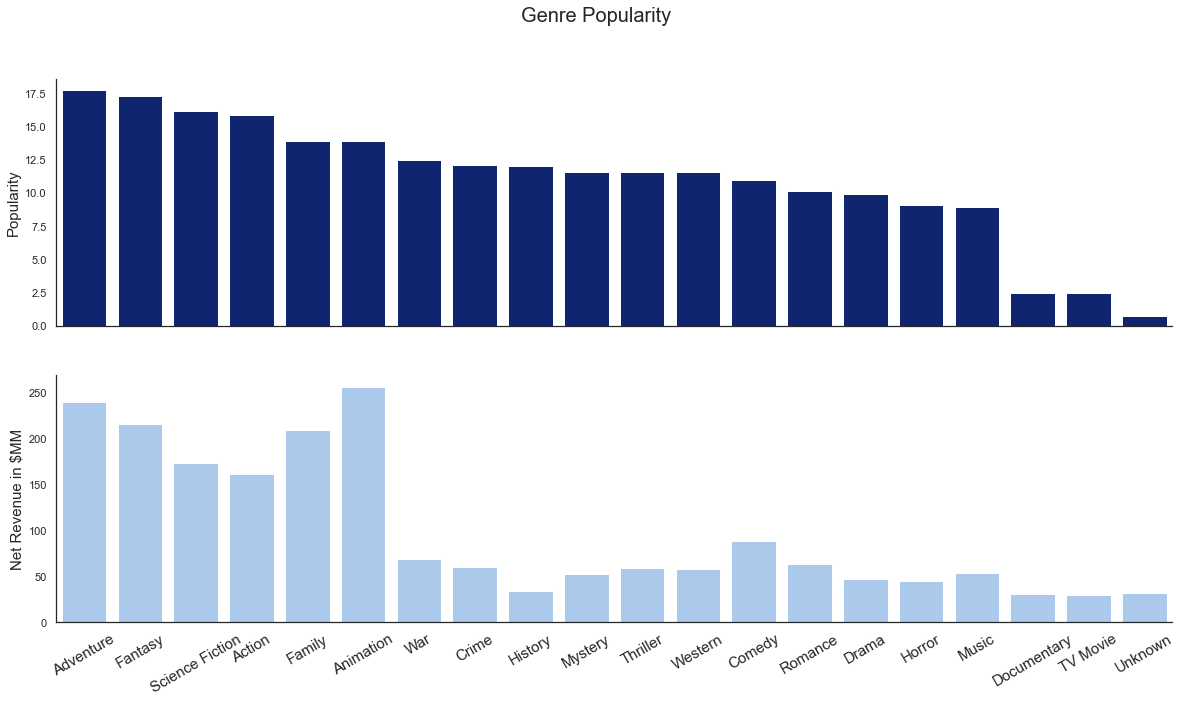

In [223]:
# Initialize the matplotlib figure
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(20,10), sharex=True)
sns.set_theme(style="white")

# Plot the total crashes
sns.set_color_codes("dark")
sns.barplot(x=genre_popularity_ds.index, y=genre_popularity_ds[0],
            color="b", ax =ax[0])
ax[0].set_ylabel ('Popularity',fontsize = 15)
sns.set_color_codes("pastel")
sns.barplot(x=genre_net_revenue_ds.index, y=genre_net_revenue_ds[0],
            color="b", ax =ax[1])
ax[1].set_ylabel ('Net Revenue in $MM',fontsize = 15)
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation = 30, fontsize =15)
fig.suptitle("Genre Popularity",fontsize = 20)
sns.despine()
plt.savefig('Images/genre.png')
plt.savefig('Images/genre.jpeg')
plt.show()

After deciding that rebooting hit films from the 80’s and 90’s is the way to go, one must ascertain the next step. Which genre? Through analyzing popularity and ROI for specific genres, our findings show that adventure, fantasy, scifi, action, family, and animation are the most popular genres.

Exploring the popularity of genres gives our key stakeholders a direction.

## 3. How to reboot?

Since Microsoft has no prior movie industry experience, and, therefore, no intellectual property of movies, they must acquire IP. Which studios should Microsoft pay for their IP? This wil depend on Microsoft's budget

- Categorize high, medium, low budget
- Create a list of top 20 studios
- Calculate the average net revenue and average production budget for each studio
- Also classify genres in each studio and sort that by number of movies in each genre
- Compare average revenue, average production budget and number of movies by genre for each studio

#### Classify High, Medium, Low Budget Tiers

Determine budget tiers from production budget of movies beyond 2000

In [224]:
# Filter for movies released 2000 and beyong

movies_2000s = movie_budget_df[movie_budget_df['Year']>2000]

In [225]:
#Find the stats of the production budget for those movies
movies_2000s['production_budget'].describe()

count    4198.000000
mean       34.658616
std        46.064139
min         0.001100
25%         5.000000
50%        18.000000
75%        42.000000
max       425.000000
Name: production_budget, dtype: float64

* **High Budget**: Over 43 USD Million (above the 75th percentile)
* **Medium Budget**: Between 18 to 43 USD Million (between the median and 75th percentile)
* **Low Budget**: Between 5 to 18 USD Million (between the 25th percentile and the median)

A budget tier system gives Microsoft a clear path to follow in IP acquisition, based on their budgetary preferences

#### Top 20 studios from Rotten Tomatoes

In [226]:
#Drop missing data from relevant columns and reset the index.
rt_movies_df_cleaned = rt_movies_df.dropna(subset = ['production_company','audience_rating'])
rt_movies_df_cleaned = rt_movies_df_cleaned.reset_index(drop = True)

In [227]:
#Sanity check
rt_movies_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16972 entries, 0 to 16971
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              16972 non-null  object 
 1   movie_title                       16972 non-null  object 
 2   movie_info                        16767 non-null  object 
 3   critics_consensus                 9020 non-null   object 
 4   content_rating                    16972 non-null  object 
 5   genres                            16957 non-null  object 
 6   directors                         16823 non-null  object 
 7   authors                           15665 non-null  object 
 8   actors                            16695 non-null  object 
 9   original_release_date             16069 non-null  object 
 10  streaming_release_date            16696 non-null  object 
 11  runtime                           16762 non-null  float64
 12  prod

In [228]:
#Create studio dictionary to classify subsidiaries into the same conglomerate company
studio_dict={"Sony": "Sony Pictures Entertainment", "Warner":"Warner Brothers","Fox":"21st Century Fox"
             , "Paramount":"Paramount Pictures",'MGM':'MGM', 'HBO':"HBO","Lion":"Lions Gate","Miramax":"Miramax",
             "Disney": "Walt Disney","WARNER":"Warner Brothers", "Buena":"Buena Vista","MCA":"Universal Pictures"}

In [229]:
#Sanity check
rt_movies_df_cleaned.shape

(16972, 22)

In [230]:
#classify subsidiaries into the same conglomerate company

idx = 0
for company in rt_movies_df_cleaned['production_company']:
    for key,value in studio_dict.items():
        if key in company:
#             print (company, value)
#             print ("Before: ", rt_movies_df_cleaned['production_company'][idx]) ## uncomment this line for sanity check, and error solving
            rt_movies_df_cleaned['production_company'][idx] = value
#             print("After: ", rt_movies_df_cleaned['production_company'][idx]) ##uncomment this line for sanity check, and error solving
    idx +=1     

In [231]:
#Merge rotten tomatoes and TN to get the production budget by studio

rt_movies_tn = rt_movies_df_cleaned.merge(movie_budget_df,how = 'inner',
                                         left_on = 'movie_title',right_on='movie')

In [232]:
# Get the top 20 studios and their movie counts.
top_20_studios = list(rt_movies_tn['production_company'].value_counts().index)[0:20]
top_20_studios_counts = rt_movies_tn['production_company'].value_counts()[0:20]
top_20_studios_counts.head()

Warner Brothers                501
21st Century Fox               458
Sony Pictures Entertainment    416
Paramount Pictures             404
Universal Pictures             354
Name: production_company, dtype: int64

In [233]:
#Filter dataframe to just movies produced by the top 20 studios
rt_movies_top_20_studios = rt_movies_tn[rt_movies_tn['production_company'].isin(top_20_studios)]

#Sanity check
rt_movies_top_20_studios.tail(2)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,tomatometer_rotten_critics_count,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year,Reboot,net_revenue
4746,m/zootopia,Zootopia,From the largest elephant to the smallest shre...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","J.K. Simmons, Kristen Bell, Octavia Spencer, A...",2016-03-04,...,7,57,2016-03-04,Zootopia,150.0,341.268248,1019.429616,2016,False,869.429616
4747,m/zulu,Zulu,"In 1879, the Zulu nation hands colonial Britis...",Zulu patiently establishes a cast of colorful ...,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,...,1,82,2013-12-31,Zulu,16.0,0.000000,1.844228,2013,False,-14.155772


Now that we have the top 20 studios by movie counts, let's calculate their net revenue

In [234]:
#Calculate net revenue by studio
net_revenue_by_studio = rt_movies_top_20_studios.groupby('production_company').mean()['net_revenue']
net_revenue_by_studio = net_revenue_by_studio.sort_values(ascending = False)

#ensure top 20 studio movie counts DF is similarly sorted as net revenue for plotting purposes
top_20_studios_counts = top_20_studios_counts.reindex(index=net_revenue_by_studio.index)
net_revenue_by_studio

production_company
Walt Disney                    292.991816
Buena Vista                    106.392687
Universal Pictures             105.814782
Warner Brothers                 93.896417
21st Century Fox                91.804085
Paramount Pictures              91.251037
New Line Cinema                 70.509552
Columbia Pictures               70.499169
Sony Pictures Entertainment     65.462263
Summit Entertainment            64.317540
Lions Gate                      49.663584
Touchstone Pictures             44.629749
The Weinstein Company           40.866310
United Artists                  40.231349
Miramax                         36.821240
Focus Features                  35.349500
MGM                             31.523421
Open Road Films                 12.757290
IFC Films                        9.751333
Magnolia Pictures                0.436888
Name: net_revenue, dtype: float64

In [235]:
#Calculate production budget by studio
average_budget_by_studio = rt_movies_top_20_studios.groupby('production_company').mean()['production_budget']

#ensure top 20 studio movie counts DF is similarly sorted as net revenue for plotting purposes
average_budget_by_studio = average_budget_by_studio.reindex(index=net_revenue_by_studio.index)
average_budget_by_studio

production_company
Walt Disney                    108.598276
Buena Vista                     50.859409
Universal Pictures              46.936638
Warner Brothers                 54.467144
21st Century Fox                38.776144
Paramount Pictures              46.927908
New Line Cinema                 36.155814
Columbia Pictures               43.439812
Sony Pictures Entertainment     37.158791
Summit Entertainment            42.448837
Lions Gate                      27.032894
Touchstone Pictures             33.894939
The Weinstein Company           18.821875
United Artists                  14.518980
Miramax                         20.546828
Focus Features                  20.415278
MGM                             27.329233
Open Road Films                 23.303226
IFC Films                        9.123587
Magnolia Pictures                7.922000
Name: production_budget, dtype: float64

Now we calculated the average net revenue and production budget by studio. 

#### Rotten Tomatoes movies genre by studio

Now we will find the top 3 movie genres produced by each top 20 studios using Rotten Tomatoes data

In [236]:
rt_movies_top_20_studios['genres'] = rt_movies_top_20_studios['genres'].str.replace(' &',',')
rt_movies_top_20_studios['genres'] = rt_movies_top_20_studios['genres'].str.split(',')

In [237]:
#Create columns with genre names with boolean values. True if movie falls under that genre
for genre in tmdb_genre_list:
    rt_movies_top_20_studios[genre]=[True if genre in movie else False for movie in rt_movies_top_20_studios['genres']]

In [238]:
#Find the sum of movies in each genre by studio
studio_genre_sum = rt_movies_top_20_studios.groupby('production_company').sum()

In [239]:
#make a list of irrelevant columns to drop
column_to_drop = list(studio_genre_sum.columns)
column_to_drop = column_to_drop[0:15]
column_to_drop

['runtime',
 'tomatometer_rating',
 'tomatometer_count',
 'audience_rating',
 'audience_count',
 'tomatometer_top_critics_count',
 'tomatometer_fresh_critics_count',
 'tomatometer_rotten_critics_count',
 'id',
 'production_budget',
 'domestic_gross',
 'worldwide_gross',
 'Year',
 'Reboot',
 'net_revenue']

In [240]:
# drop irrelevant columns
studio_genre_sum_drop = studio_genre_sum.drop(column_to_drop,axis = 1)
#Sanity check
studio_genre_sum_drop

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,Unknown
production_company,,,,,,,,,,,,,,,,,,,,
21st Century Fox,147,0,15,139,0,0,91,0,0,0,11,0,12,0,3,0,0,0,0,0
Buena Vista,50,0,15,38,0,1,16,0,0,0,3,0,2,0,0,0,0,0,0,0
Columbia Pictures,42,0,1,39,0,0,27,0,0,0,3,0,0,0,0,0,0,0,0,0
Focus Features,13,0,0,24,0,0,29,0,0,0,1,0,2,1,0,0,0,0,0,0
IFC Films,3,0,0,13,0,3,18,0,0,0,1,0,2,0,0,0,0,0,0,0
Lions Gate,51,0,3,36,0,3,49,0,0,0,18,0,5,0,0,0,0,0,0,0
MGM,66,0,1,37,0,1,29,0,0,0,14,0,2,0,1,0,0,0,0,0
Magnolia Pictures,5,0,0,8,0,5,17,0,0,0,4,0,2,0,0,0,0,0,0,0
Miramax,20,0,0,48,0,0,38,0,0,0,6,0,0,0,0,0,0,0,0,0


In [241]:
#Transpose data frame for easier anlysis in finding top 3 genres for each studio
studio_genre_sum_drop = studio_genre_sum_drop.transpose()
studio_genre_sum_drop

production_company,21st Century Fox,Buena Vista,Columbia Pictures,Focus Features,IFC Films,Lions Gate,MGM,Magnolia Pictures,Miramax,New Line Cinema,Open Road Films,Paramount Pictures,Sony Pictures Entertainment,Summit Entertainment,The Weinstein Company,Touchstone Pictures,United Artists,Universal Pictures,Walt Disney,Warner Brothers
Action,147,50,42,13,3,51,66,5,20,35,10,142,128,20,4,7,20,122,60,204
Adventure,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Animation,15,15,1,0,0,3,1,0,0,0,2,12,14,0,0,0,0,7,23,13
Comedy,139,38,39,24,13,36,37,8,48,33,5,94,101,8,12,15,5,103,21,110
Crime,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Documentary,0,1,0,0,3,3,1,5,0,0,0,7,9,0,1,0,0,2,2,2
Drama,91,16,27,29,18,49,29,17,38,22,13,75,104,10,24,9,5,68,7,121
Family,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
History,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [242]:
#Create a nested dictionary populated with studios as outer keys, genre as inner keys and movie count as values
genre_studio = {}
for studio in top_20_studios: # loop through each studios
    studio_value = studio_genre_sum_drop[studio].sort_values(ascending = False) 
    genre_studio[studio]={studio_value.index[0] : studio_value.values[0],studio_value.index[1] : studio_value.values[1],
                  studio_value.index[2] : studio_value.values[2]}

In [243]:
#transform it into a dataframe and transpose
genre_studio = pd.DataFrame(genre_studio)
genre_studio = genre_studio.transpose()
genre_studio

,Action,Drama,Comedy,Animation,Horror
Warner Brothers,204.0,121.0,110.0,NaN,NaN
21st Century Fox,147.0,91.0,139.0,NaN,NaN
Sony Pictures Entertainment,128.0,104.0,101.0,NaN,NaN
Paramount Pictures,142.0,75.0,94.0,NaN,NaN
Universal Pictures,122.0,68.0,103.0,NaN,NaN
MGM,66.0,29.0,37.0,NaN,NaN
Lions Gate,51.0,49.0,36.0,NaN,NaN
Buena Vista,50.0,16.0,38.0,NaN,NaN
Walt Disney,60.0,NaN,21.0,23.0,NaN
Miramax,20.0,38.0,48.0,NaN,NaN


In [244]:
#ensure top genres by studio is sorted similarly to net revenue by studio data frame
genre_studio = genre_studio.reindex(index=net_revenue_by_studio.index)

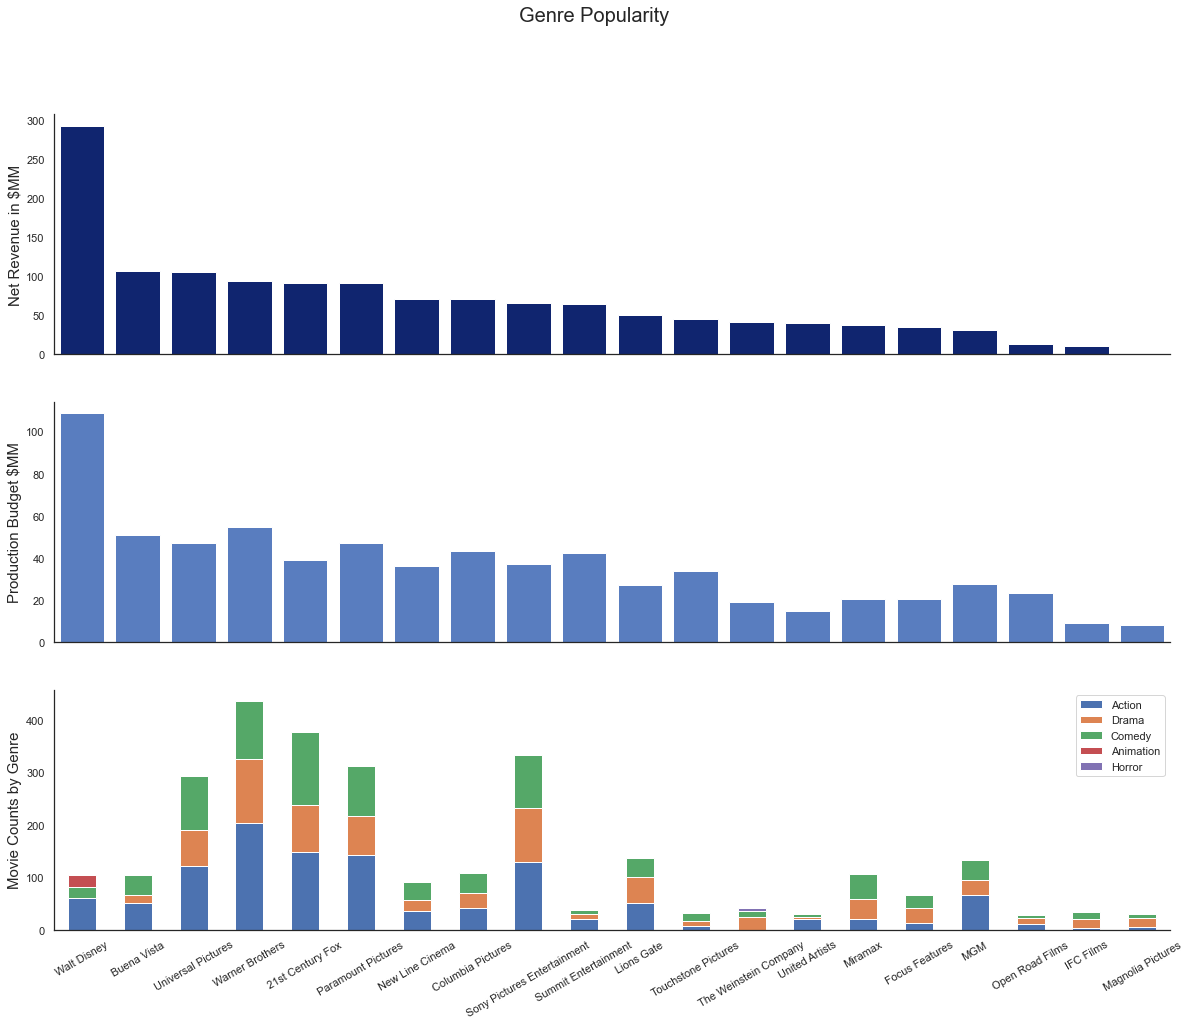

In [245]:
#Bar plot of net revenue, average production costs, top 3 genres bt studio
sns.set_theme(style="white")

# Initialize the matplotlib figure
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(20,15), sharex=True)

# Plot the Net Revenue
sns.set_color_codes("dark")
sns.barplot(x=net_revenue_by_studio.index, y=net_revenue_by_studio.values,
            color="b", ax =ax[0])
ax[0].set_ylabel ('Net Revenue in $MM',fontsize = 15)

#Plot production budget
sns.set_color_codes("muted")
sns.barplot(x=average_budget_by_studio.index, y=average_budget_by_studio.values,
            color="b", ax =ax[1])
ax[1].set_ylabel ('Production Budget $MM',fontsize = 15)

#Plot Top 3 genre by studio
genre_studio.plot(kind='bar', stacked=True,ax=ax[2])
ax[2].set_ylabel ('Movie Counts by Genre',fontsize = 15)

ax[0].set(xlabel = None)
ax[1].set(xlabel = None)
ax[2].set(xlabel = None)
ax[2].set_xticklabels(ax[2].get_xticklabels(),rotation = 30)
fig.suptitle("Genre Popularity",fontsize = 20)
sns.despine()
plt.savefig('Images/studio.png')
plt.savefig('Images/studio.jpeg')
plt.show()

Since Microsoft has no prior movie industry experience, and, therefore, no intellectual property of movies, they must acquire IP.

A budget tier system gives Microsoft a clear path to follow in IP acquisition, based on their budgetary preferences.

The tiers are classified into High, Medium and Low. These figures were acquired through statistical analysis of production costs of all movies in the last 20 years.

Through further data analysis, we conclude that Microsoft should acquire their intellectual property from the following movie studios: Walt Disney, Buena Vista, Universal Pictures, Warner Brothers, 21st Century Fox, Paramount Pictures.

Fiscal data analysis points us in the direction of specific movie studios, based on their associated value.

The more valuable a movie studio, the more expensive their IP is.

Furthermore, the most produced genres in our recommended studios allign with our genre popularity finding.

## Conclusion

Our recommendations follow a chronological pipeline of actionable applications of our data findings. The key stakeholder will be able to apply our recommendations to a real life business problem. 

The first recommendation is to reboot blockbuster films from the 80’s and 90’s. Our data reiterates that more movies from these 2 decades have been rebooted, than not. Comparative fiscal data for reboots vs. non-reboots allows us to conclude that hit films, specifically from these 2 decades, are the most profitable to reboot. Additionally, these reboots happen to be even more profitable than original films. 

Once the first recommendation is accepted, the second recommendation provides the next step. After deciding that rebooting hit films from the 80’s and 90’s is the way to go, one must ascertain the next step. Which genre? Through analyzing popularity and ROI for specific genres, our findings show that adventure, fantasy, scifi, action, family, and animation are the most popular genres. Exploring the popularity of genres gives our key stakeholders a direction. 

The third recommendation gets even more specific. Since Microsoft has no prior movie industry experience, and, therefore, no intellectual property of movies, they must acquire IP. Once the genre has been decided, where would the stakeholder acquire their intellectual property necessary for a reboot that they don’t own the rights to? Data analysis points us in the direction of specific movie studios, based on their associated value. The more valuable a movie studio, the more expensive their IP is. A budget tier system gives Microsoft a clear path to follow, based on their preferences. 
